In [1]:
using JLD
using CairoMakie

In [2]:
start_k1, end_k1, step_k1 = -0.5, 0.5, 0.01
start_k2, end_k2, step_k2 = -0.5, 0.5, 0.01

k1_array = range( start_k1, end_k1, step = step_k1 )
k2_array = range( start_k2, end_k2, step = step_k2 )

-0.5:0.01:0.5

In [3]:
pwd()

"C:\\Users\\Alex\\Desktop\\dynamical-systems\\Hindmarrh Rose\\chaos_EV_map"

In [4]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Hindmarrh Rose\\")

In [5]:
spectrum_matrix = load("map_LES_k_equal_00.jld")["data"]
color_matrix = zeros( ( length(k1_array), length(k2_array) ) );

In [27]:
spectrum_matrix01 = load("map_LES_k_equal_01.jld")["data"]
color_matrix01 = zeros( ( length(k1_array), length(k2_array) ) );

Гиперхаос(+,+,0,-,-,-)
хаос (+,0, -,-,-,-)
квазипериодика (0,0,-,-,-,-)
периодическое движение (0,-,-,-,-,-)
остальное (если вдруг там есть ещё какие-то экзотические варианты)

In [11]:
function check_condition(spectrum)
    
    checknull(spectrum[1]) && checknull(spectrum[2])  && spectrum[3]<0  && spectrum[4]<0 && spectrum[5]<0 && spectrum[6]<0   ? color = 3 :
    checknull(spectrum[1]) && spectrum[2]<0  && spectrum[3]<0  && spectrum[4]<0 && spectrum[5]<0 && spectrum[6]<0   ? color = 2 :
    
    spectrum[1]>0  && checknull(spectrum[2])  && spectrum[3]<0  && spectrum[4]<0 && spectrum[5]<0 && spectrum[6]<0   ? color = 4 :
    spectrum[1]>0  && spectrum[2]>0   && checknull(spectrum[3]) && spectrum[4]<0 && spectrum[5]<0 && spectrum[6]<0   ? color = 5 :
    
    
    color = 1
    
end

check_condition (generic function with 1 method)

In [23]:
function check_condition(spectrum)
    
    checknull(spectrum[1]) && spectrum[2]<0  ? color = 2 :
    checknull(spectrum[1]) && checknull(spectrum[2])  && spectrum[3]<0 ? color = 3 :
    
    spectrum[1]>0  && checknull(spectrum[2])  && spectrum[3]<0 ? color = 4 :
    spectrum[1]>0  && spectrum[2]>0   && checknull(spectrum[3]) && spectrum[4]<0 ? color = 5 :
    
    
    color = 1
    
end

check_condition (generic function with 1 method)

In [33]:
function checknull(value)

    isapprox(value, 0.0; atol = 1e-3)
end

checknull (generic function with 1 method)

In [14]:
function checknull(value)

    abs(value) < 0.01
    
end

checknull (generic function with 1 method)

In [36]:
for (i, k1) in enumerate(range( start_k1, end_k1, step = step_k1 ))
    
    for (j, k2) in enumerate(range( start_k2, end_k2, step = step_k2 ))
        spectrum = spectrum_matrix[i, j, :]
        color_matrix[i, j] = check_condition(spectrum)
    end
end

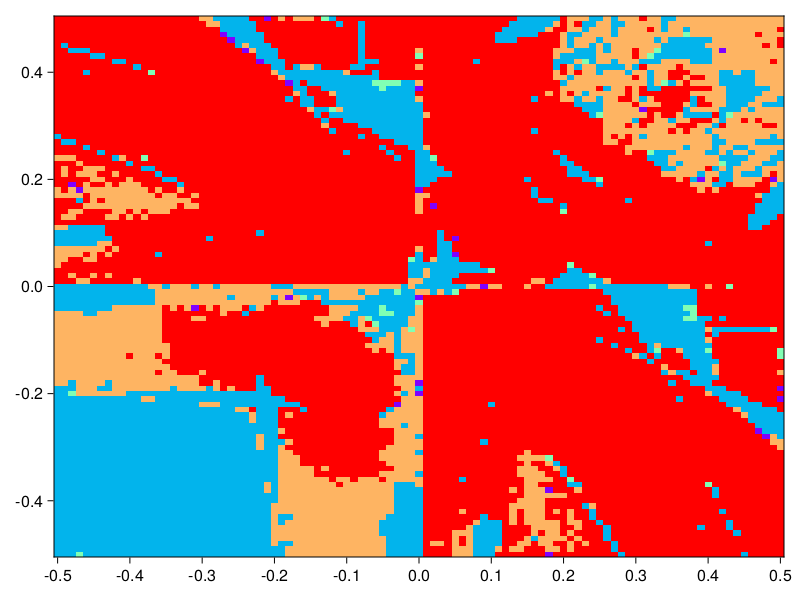

In [37]:
fig, ax, hm = heatmap(k1_array, k1_array, color_matrix, colormap = :rainbow1)
# Colorbar(fig[:, end+1], hm)
ax.xticks = range(-0.5, 0.5, step = 0.1)
fig

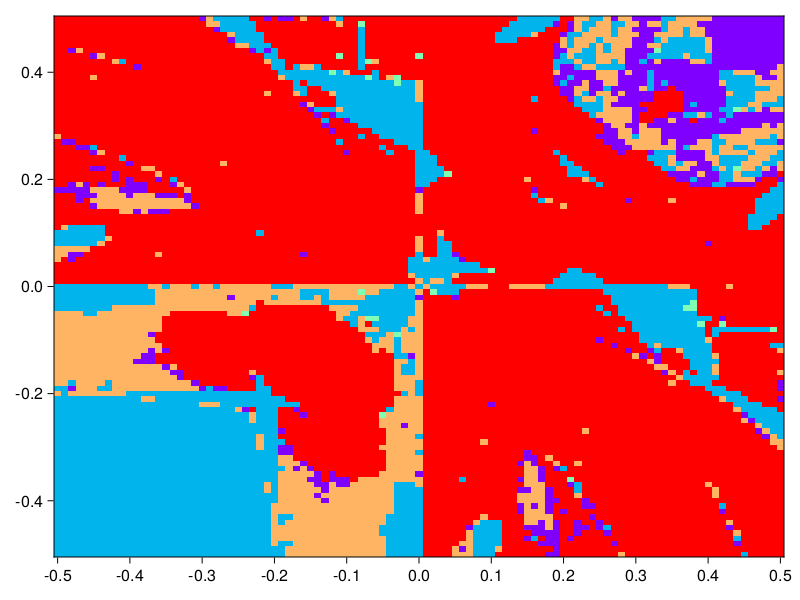

In [85]:
fig, ax, hm = heatmap(k1_array, k1_array, color_matrix, colormap = :rainbow1)
# Colorbar(fig[:, end+1], hm)
ax.xticks = range(-0.5, 0.5, step = 0.1)
fig

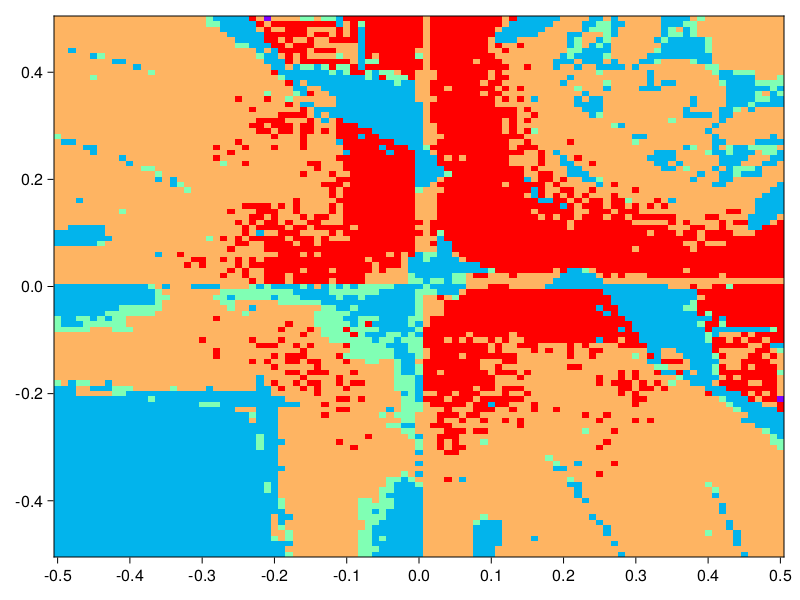

In [27]:
fig, ax, hm = heatmap(k1_array, k1_array, color_matrix, colormap = :rainbow1)
# Colorbar(fig[:, end+1], hm)
ax.xticks = range(-0.5, 0.5, step = 0.1)
fig

In [34]:
for (i, k1) in enumerate(range( start_k1, end_k1, step = step_k1 ))
    
    for (j, k2) in enumerate(range( start_k2, end_k2, step = step_k2 ))
        spectrum = spectrum_matrix01[i, j, :]
        color_matrix01[i, j] = check_condition(spectrum)
    end
end

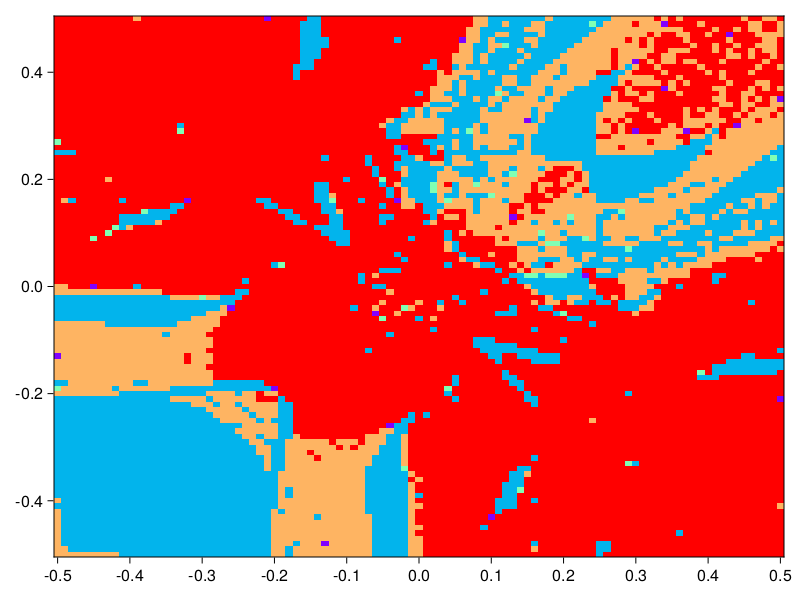

In [35]:
fig, ax, hm = heatmap(k1_array, k1_array, color_matrix01, colormap = :rainbow1)
# Colorbar(fig[:, end+1], hm)
ax.xticks = range(-0.5, 0.5, step = 0.1)
fig

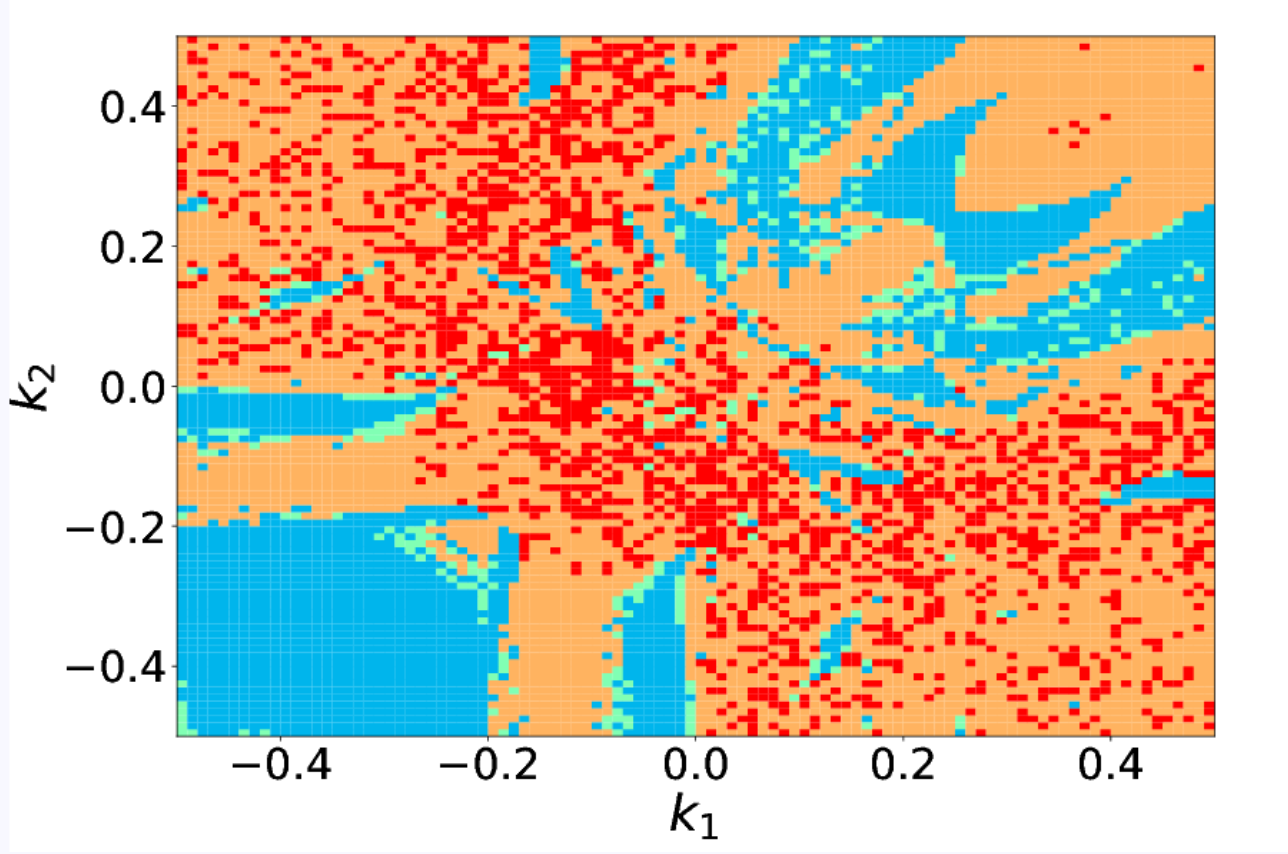

In [38]:
using NPZ

In [41]:
EV_map00 = load("map_EEs_equal_00.jld")["data"]
EV_map01 = load("map_EEs_equal_01.jld")["data"];

In [42]:
NPZ.npzwrite("map_EEs_equal_00.npy",EV_map00)
NPZ.npzwrite("map_EEs_equal_01.npy",EV_map01)

In [43]:
NPZ.npzwrite("map_LES_k_equal_00.npy",spectrum_matrix)
NPZ.npzwrite("map_LES_k_equal_01.npy",spectrum_matrix01)

In [44]:
NPZ.npzwrite("map_LES_k_equal_00.npy",color_matrix)
NPZ.npzwrite("map_LES_k_equal_01.npy",color_matrix01)